<a href="https://colab.research.google.com/github/Yagoly/Variables-macroeconomicas-que-influyen-en-el-incumplimiento-de-pago/blob/main/Incumplimiento_de_pago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables macroeconómicas que influyen en el incumplimiento de pago ⚡

In [ ]:
# Cargamos las paqueterias a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

# Importamos Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#importamos drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargamos los datos del data set de 
datos = pd.read_csv("/content/drive/MyDrive/FISICA/SEMESTRE 2023-1/LABO CONTEMPO I/Rotativo Banco Base/Correlacion de variables/Correlacion_varibles.csv")
datos

Fecha  Actividades secundarias General  Actividades terciarias General  \
0   2017Q1                        5390112.3                      11070479.4   
1   2017Q2                        5373416.8                      11324627.0   
2   2017Q3                        5371934.5                      11250631.0   
3   2017Q4                        5388078.6                      11834108.1   
4   2018Q1                        5363257.1                      11308424.2   
5   2018Q2                        5493156.4                      11751116.2   
6   2018Q3                        5445423.5                      11646738.2   
7   2018Q4                        5315976.5                      12104803.8   
8   2019Q1                        5348643.2                      11512279.0   
9   2019Q2                        5313786.0                      11740055.2   
10  2019Q3                        5357738.0                      11699580.7   
11  2019Q4                        5199290.1                      12122903.3   
12  2020Q1                        5252831.4                      11490351.0   
13  2020Q2                        4010536.2                       9806869.6   
14  2020Q3                        4904834.2                      10703035.2   
15  2020Q4                        5027686.3                      11562162.0   
16  2021Q1                        5072431.5                      11044935.6   
17  2021Q2                        5090826.6                      11568142.2   
18  2021Q3                        5140788.8                      11162875.3   
19  2021Q4                        5114208.0                      11591787.9   
20  2022Q1                        5231935.9                      11146079.1   
21  2022Q2                        5259746.9                      11702160.0   

    Actividades secundarías Construcción  \
0                              1256918.0   
1                              1249349.8   
2                              1291975.9   
3                              1339209.1   
4                              1288973.3   
5                              1307574.8   
6                              1284379.0   
7                              1265594.1   
8                              1297162.0   
9                              1215442.7   
10                             1195532.5   
11                             1187793.3   
12                             1183016.1   
13                              821822.4   
14                              987921.3   
15                             1055127.2   
16                             1081638.9   
17                             1064205.7   
18                             1084673.6   
19                             1074995.7   
20                             1081599.7   
21                             1075690.7   

    Actividades terciarias Transportes correos y almacenamiento  \
0                                           1136559.4             
1                                           1162356.8             
2                                           1166695.8             
3                                           1191684.9             
4                                           1174370.4             
5                                           1210148.2             
6                                           1207666.0             
7                                           1213930.8             
8                                           1179008.0             
9                                           1210457.6             
10                                          1213225.2             
11                                          1198657.6             
12                                          1149758.1             
13                                           728054.7             
14                                           926141.5             
15                                          1030881.7             
16                                 

## Limpieza de datos

In [ ]:
#Mostramos la información del dataset y el tipo de datos que tenemos
datos.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 21 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Fecha                                                                                             22 non-null     object 
 1   Actividades secundarias General                                                                   22 non-null     float64
 2   Actividades terciarias General                                                                    22 non-null     float64
 3   Actividades secundarías Construcción                                                              22 non-null     float64
 4   Actividades terciarias Transportes correos y almacenamiento                                       22 non-null     float64
 5   Act

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


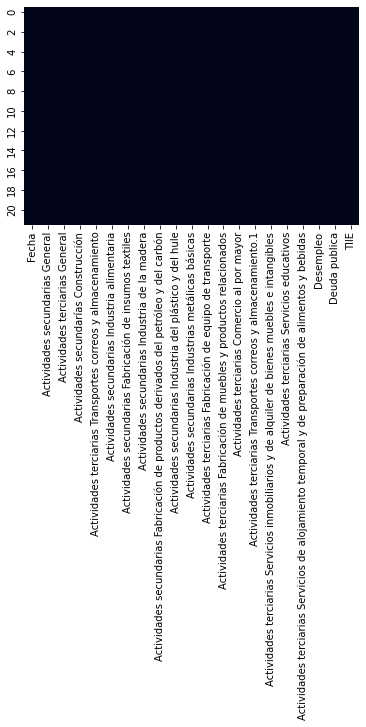

In [ ]:
# Mostramos los datos nulos
sns.heatmap(datos.isnull(),cbar=False)

In [ ]:
#Número de datos nulos y su porcentaje en las columnas
porcentaje_nulos= datos.isnull().mean().round(4)*100
pd.merge(datos.isnull().sum().reset_index(),porcentaje_nulos.reset_index(), how="inner", on="index", suffixes=("_Valores Nulos", "_Porcentaje de valores nulos"))

index  0_Valores Nulos  \
0                                               Fecha                0   
1                     Actividades secundarias General                0   
2                      Actividades terciarias General                0   
3                Actividades secundarías Construcción                0   
4   Actividades terciarias Transportes correos y a...                0   
5       Actividades secundarias Industria alimentaria                0   
6   Actividades secundarias Fabricación de insumos...                0   
7      Actividades secundarias Industria de la madera                0   
8   Actividades secundarias Fabricación de product...                0   
9   Actividades secundarias Industria del plástico...                0   
10  Actividades secundarias Industrias metálicas b...                0   
11  Actividades terciarias Fabricación de equipo d...                0   
12  Actividades terciarias Fabricación de muebles ...                0   
13       Actividades terciarias Comercio al por mayor                0   
14  Actividades terciarias Transportes correos y a...                0   
15  Actividades terciarias Servicios inmobiliarios...                0   
16        Actividades terciarias Servicios educativos                0   
17  Actividades terciarias Servicios de alojamient...                0   
18                                          Desempleo                0   
19                                      Deuda publica                0   
20                                               TIIE                0   

    0_Porcentaje de valores nulos  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
5                             0.0  
6                             0.0  
7                             0.0  
8                             0.0  
9                             0.0  
10                            0.0  
11                            0.0  
12                            0.0  
13                            0.0  
14                            0.0  
15                            0.0  
16                            0.0  
17                            0.0  
18                            0.0  
19                            0.0  
20                            0.0

In [ ]:
#Borramos las columnas duplicadas
datos2 = datos.drop(['Actividades terciarias Transportes correos y almacenamiento.1'],axis=1)
datos2.head(5) 

Fecha  Actividades secundarias General  Actividades terciarias General  \
0  2017Q1                        5390112.3                      11070479.4   
1  2017Q2                        5373416.8                      11324627.0   
2  2017Q3                        5371934.5                      11250631.0   
3  2017Q4                        5388078.6                      11834108.1   
4  2018Q1                        5363257.1                      11308424.2   

   Actividades secundarías Construcción  \
0                             1256918.0   
1                             1249349.8   
2                             1291975.9   
3                             1339209.1   
4                             1288973.3   

   Actividades terciarias Transportes correos y almacenamiento  \
0                                          1136559.4             
1                                          1162356.8             
2                                          1166695.8             
3                                          1191684.9             
4                                          1174370.4             

   Actividades secundarias Industria alimentaria  \
0                                       669975.8   
1                                       649722.4   
2                                       634429.1   
3                                       670693.0   
4                                       682792.5   

   Actividades secundarias Fabricación de insumos textiles  \
0                                            26144.8         
1                                            26795.0         
2                                            27103.1         
3                                            24340.8         
4                                            25666.0         

   Actividades secundarias Industria de la madera  \
0                                         25632.5   
1                                         25747.2   
2                                         25025.2   
3                                         23914.5   
4                                         25466.6   

   Actividades secundarias Fabricación de productos derivados del petróleo y del carbón  \
0                                            57506.5                                      
1                                            55997.3                                      
2                                            43412.1                                      
3                                            37705.2                                      
4                                            38817.7                                      

   Actividades secundarias Industria del plástico y del hule  \
0                                            82582.5           
1                                            84297.1           
2                                            82639.3           
3                                            80822.4           
4                                            81945.4           

   Actividades secundarias Industrias metálicas básicas  \
0                                           188347.5      
1                                           180040.4      
2                                           182111.2      
3                                           185079.7      
4                                           183602.9      

   Actividades terciarias Fabricación de equipo de transporte  \
0                                           572129.7            
1                                           578444.1            
2                                           590329.2            
3                                           584743.4            
4                                           590717.1            

   Actividades terciarias Fabricación de muebles y productos relacionados  \
0                                            28696.5                        
1                                         

In [ ]:
#Transformamos la columna Fecha con datetime en un formato más accesible
datos2['Fecha'] = pd.to_datetime(datos2['Fecha'])
datos2

Fecha  Actividades secundarias General  \
0  2017-01-01                        5390112.3   
1  2017-04-01                        5373416.8   
2  2017-07-01                        5371934.5   
3  2017-10-01                        5388078.6   
4  2018-01-01                        5363257.1   
5  2018-04-01                        5493156.4   
6  2018-07-01                        5445423.5   
7  2018-10-01                        5315976.5   
8  2019-01-01                        5348643.2   
9  2019-04-01                        5313786.0   
10 2019-07-01                        5357738.0   
11 2019-10-01                        5199290.1   
12 2020-01-01                        5252831.4   
13 2020-04-01                        4010536.2   
14 2020-07-01                        4904834.2   
15 2020-10-01                        5027686.3   
16 2021-01-01                        5072431.5   
17 2021-04-01                        5090826.6   
18 2021-07-01                        5140788.8   
19 2021-10-01                        5114208.0   
20 2022-01-01                        5231935.9   
21 2022-04-01                        5259746.9   

    Actividades terciarias General  Actividades secundarías Construcción  \
0                       11070479.4                             1256918.0   
1                       11324627.0                             1249349.8   
2                       11250631.0                             1291975.9   
3                       11834108.1                             1339209.1   
4                       11308424.2                             1288973.3   
5                       11751116.2                             1307574.8   
6                       11646738.2                             1284379.0   
7                       12104803.8                             1265594.1   
8                       11512279.0                             1297162.0   
9                       11740055.2                             1215442.7   
10                      11699580.7                             1195532.5   
11                      12122903.3                             1187793.3   
12                      11490351.0                             1183016.1   
13                       9806869.6                              821822.4   
14                      10703035.2                              987921.3   
15                      11562162.0                             1055127.2   
16                      11044935.6                             1081638.9   
17                      11568142.2                             1064205.7   
18                      11162875.3                             1084673.6   
19                      11591787.9                             1074995.7   
20                      11146079.1                             1081599.7   
21                      11702160.0                             1075690.7   

    Actividades terciarias Transportes correos y almacenamiento  \
0                                           1136559.4             
1                                           1162356.8             
2                                           1166695.8             
3                                           1191684.9             
4                                           1174370.4             
5                                           1210148.2             
6                                           1207666.0             
7                                           1213930.8             
8                                           1179008.0             
9                                           1210457.6             
10                                          1213225.2             
11                                          1198657.6             
12                                          1149758.1             
13                                           728054.7             
14                                           926141.5             
15                                  

In [ ]:
#Estandarizamos los datos
scaler = MinMaxScaler()
transformed_datos2 = scaler.fit_transform(datos2.iloc[:, 1:21])
transformed_datos2

array([[0.93049865, 0.54559215, 0.84094856, 0.74015054, 0.39662121,
        0.89981219, 0.92913186, 1.        , 0.60971676, 1.        ,
        0.84761581, 0.57243545, 0.49190616, 0.16618565, 0.81087278,
        0.91796089, 0.17894737, 0.07547414, 0.49270398],
       [0.91923785, 0.65532613, 0.82632082, 0.78689164, 0.17063883,
        0.93345302, 0.94180701, 0.940722  , 0.65651286, 0.81811793,
        0.8632969 , 0.5635889 , 0.67339031, 0.19519304, 0.73988433,
        0.96347084, 0.10526316, 0.        , 0.63998499],
       [0.91823806, 0.62337668, 0.90870813, 0.79475327, 0.        ,
        0.94939388, 0.86202095, 0.44640353, 0.61126698, 0.86345762,
        0.89281217, 0.58863325, 0.72365606, 0.        , 0.28963153,
        0.93225822, 0.03859649, 0.0265476 , 0.72181298],
       [0.92912696, 0.87530613, 1.        , 0.84002985, 0.40462355,
        0.80647465, 0.73928082, 0.22224928, 0.56167883, 0.92845226,
        0.87894048, 0.82483501, 0.88483992, 0.04518445, 0.86082171,
        0.892

In [ ]:
#Los datos estandarizados, los transformamos en un data frame
transformed_datos2 = pd.DataFrame(transformed_datos2)
transformed_datos2

0         1         2         3         4         5         6   \
0   0.930499  0.545592  0.840949  0.740151  0.396621  0.899812  0.929132   
1   0.919238  0.655326  0.826321  0.786892  0.170639  0.933453  0.941807   
2   0.918238  0.623377  0.908708  0.794753  0.000000  0.949394  0.862021   
3   0.929127  0.875306  1.000000  0.840030  0.404624  0.806475  0.739281   
4   0.912385  0.648330  0.902905  0.808659  0.539627  0.875039  0.910799   
5   1.000000  0.839472  0.938858  0.873483  0.517971  1.000000  0.834980   
6   0.967805  0.794405  0.894025  0.868985  0.237701  0.995468  0.824471   
7   0.880495  0.992185  0.857718  0.880336  0.522790  0.847302  0.695111   
8   0.902529  0.736349  0.918732  0.817061  0.708297  0.876928  0.892952   
9   0.879018  0.834697  0.760786  0.874043  0.629468  0.887710  0.849931   
10  0.908663  0.817221  0.722303  0.879058  0.384523  0.895119  0.781793   
11  0.801793  1.000000  0.707345  0.852663  0.707180  0.738758  0.776676   
12  0.837905  0.726881  0.698112  0.764065  0.947968  0.734319  0.788854   
13  0.000000  0.000000  0.000000  0.000000  0.522888  0.000000  0.000000   
14  0.603188  0.386940  0.321034  0.358904  0.286110  0.555555  0.470439   
15  0.686049  0.757887  0.450929  0.548678  0.708261  0.604226  0.759857   
16  0.716229  0.534563  0.502171  0.497396  0.758614  0.677587  0.710560   
17  0.728636  0.760469  0.468476  0.709907  0.740079  0.763562  0.938834   
18  0.762335  0.585486  0.508036  0.681014  0.612210  0.870890  1.000000   
19  0.744406  0.770679  0.489331  0.826866  0.920114  0.810153  0.954018   
20  0.823812  0.578234  0.502095  0.799305  0.999660  0.822659  0.882763   
21  0.842570  0.818335  0.490674  1.000000  1.000000  0.802501  0.814105   

          7         8         9         10        11        12        13  \
0   1.000000  0.609717  1.000000  0.847616  0.572435  0.491906  0.166186   
1   0.940722  0.656513  0.818118  0.863297  0.563589  0.673390  0.195193   
2   0.446404  0.611267  0.863458  0.892812  0.588633  0.723656  0.000000   
3   0.222249  0.561679  0.928452  0.878940  0.824835  0.884840  0.045184   
4   0.265946  0.592329  0.896118  0.893775  0.606153  0.565533  0.255954   
5   0.555556  0.769535  0.996418  0.954526  0.647758  0.866319  0.397270   
6   0.391254  0.667681  0.758930  0.984223  0.666333  0.847014  0.217142   
7   0.122331  0.677793  0.637933  0.944247  0.856911  0.990990  0.222073   
8   0.194904  0.634452  0.801430  0.951170  0.571720  0.631388  0.400329   
9   0.357459  0.713025  0.659674  1.000000  0.595253  0.797876  0.502906   
10  0.409400  0.706925  0.731148  0.994376  0.594275  0.819541  0.344799   
11  0.199625  0.665326  0.540085  0.827617  0.850037  0.855455  0.358459   
12  0.040719  0.585500  0.743820  0.881713  0.530009  0.501144  0.576502   
13  0.132319  0.000000  0.000000  0.000000  0.000000  0.000000  0.237039   
14  0.000000  0.591155  0.270153  0.856522  0.481282  0.452970  0.296813   
15  0.052349  0.733667  0.629569  0.861529  0.759914  0.795755  0.374639   
16  0.363661  0.720099  0.737736  0.799602  0.577746  0.629579  0.513275   
17  0.190328  0.881514  0.799950  0.791857  0.574222  0.693792  0.664343   
18  0.307875  0.862829  0.760535  0.714879  0.690068  0.801847  0.621669   
19  0.394522  0.870046  0.766278  0.726873  1.000000  1.000000  0.611712   
20  0.551405  0.927625  0.844913  0.846788  0.673490  0.834167  0.747379   
21  0.527049  1.000000  0.866768  0.856510  0.593451  0.961928  1.000000   

          14        15        16        17        18  
0   0.810873  0.917961  0.178947  0.075474  0.492704  
1   0.739884  0.963471  0.105263  0.000000  0.639985  
2   0.289632  0.932258  0.038596  0.026548  0.721813  
3   0.860822  0.892940  0.024561  0.108469  0.732534  
4   0.710843  0.983793  0.045614  0.160768  0.809107  
5   0.919099  0.976502  0.000000  0.214976  0.839089  
6   0.343445  0.947622  0.000000  0.214976  0.894243  
7   0.905305  0.914090  0.000000  0.180912  0.927274  
8   0.878309  0.9

In [ ]:
#Agregamos la columna Fecha y la renombramos con el nombre de Date
transformed_datos2.insert(loc = 0, column = 'Date', value = datos2["Fecha"]) 
transformed_datos2

Date         0         1         2         3         4         5  \
0  2017-01-01  0.930499  0.545592  0.840949  0.740151  0.396621  0.899812   
1  2017-04-01  0.919238  0.655326  0.826321  0.786892  0.170639  0.933453   
2  2017-07-01  0.918238  0.623377  0.908708  0.794753  0.000000  0.949394   
3  2017-10-01  0.929127  0.875306  1.000000  0.840030  0.404624  0.806475   
4  2018-01-01  0.912385  0.648330  0.902905  0.808659  0.539627  0.875039   
5  2018-04-01  1.000000  0.839472  0.938858  0.873483  0.517971  1.000000   
6  2018-07-01  0.967805  0.794405  0.894025  0.868985  0.237701  0.995468   
7  2018-10-01  0.880495  0.992185  0.857718  0.880336  0.522790  0.847302   
8  2019-01-01  0.902529  0.736349  0.918732  0.817061  0.708297  0.876928   
9  2019-04-01  0.879018  0.834697  0.760786  0.874043  0.629468  0.887710   
10 2019-07-01  0.908663  0.817221  0.722303  0.879058  0.384523  0.895119   
11 2019-10-01  0.801793  1.000000  0.707345  0.852663  0.707180  0.738758   
12 2020-01-01  0.837905  0.726881  0.698112  0.764065  0.947968  0.734319   
13 2020-04-01  0.000000  0.000000  0.000000  0.000000  0.522888  0.000000   
14 2020-07-01  0.603188  0.386940  0.321034  0.358904  0.286110  0.555555   
15 2020-10-01  0.686049  0.757887  0.450929  0.548678  0.708261  0.604226   
16 2021-01-01  0.716229  0.534563  0.502171  0.497396  0.758614  0.677587   
17 2021-04-01  0.728636  0.760469  0.468476  0.709907  0.740079  0.763562   
18 2021-07-01  0.762335  0.585486  0.508036  0.681014  0.612210  0.870890   
19 2021-10-01  0.744406  0.770679  0.489331  0.826866  0.920114  0.810153   
20 2022-01-01  0.823812  0.578234  0.502095  0.799305  0.999660  0.822659   
21 2022-04-01  0.842570  0.818335  0.490674  1.000000  1.000000  0.802501   

           6         7         8         9        10        11        12  \
0   0.929132  1.000000  0.609717  1.000000  0.847616  0.572435  0.491906   
1   0.941807  0.940722  0.656513  0.818118  0.863297  0.563589  0.673390   
2   0.862021  0.446404  0.611267  0.863458  0.892812  0.588633  0.723656   
3   0.739281  0.222249  0.561679  0.928452  0.878940  0.824835  0.884840   
4   0.910799  0.265946  0.592329  0.896118  0.893775  0.606153  0.565533   
5   0.834980  0.555556  0.769535  0.996418  0.954526  0.647758  0.866319   
6   0.824471  0.391254  0.667681  0.758930  0.984223  0.666333  0.847014   
7   0.695111  0.122331  0.677793  0.637933  0.944247  0.856911  0.990990   
8   0.892952  0.194904  0.634452  0.801430  0.951170  0.571720  0.631388   
9   0.849931  0.357459  0.713025  0.659674  1.000000  0.595253  0.797876   
10  0.781793  0.409400  0.706925  0.731148  0.994376  0.594275  0.819541   
11  0.776676  0.199625  0.665326  0.540085  0.827617  0.850037  0.855455   
12  0.788854  0.040719  0.585500  0.743820  0.881713  0.530009  0.501144   
13  0.000000  0.132319  0.000000  0.000000  0.000000  0.000000  0.000000   
14  0.470439  0.000000  0.591155  0.270153  0.856522  0.481282  0.452970   
15  0.759857  0.052349  0.733667  0.629569  0.861529  0.759914  0.795755   
16  0.710560  0.363661  0.720099  0.737736  0.799602  0.577746  0.629579   
17  0.938834  0.190328  0.881514  0.799950  0.791857  0.574222  0.693792   
18  1.000000  0.307875  0.862829  0.760535  0.714879  0.690068  0.801847   
19  0.954018  0.394522  0.870046  0.766278  0.726873  1.000000  1.000000   
20  0.882763  0.551405  0.927625  0.844913  0.846788  0.673490  0.834167   
21  0.814105  0.527049  1.000000  0.866768  0.856510  0.593451  0.961928   

          13        14        15        16        17        18  
0   0.166186  0.810873  0.917961  0.178947  0.075474  0.492704  
1   0.195193  0.739884  0.963471  0.105263  0.000000  0.639985  
2   0.000000  0.289632  0.932258  0.038596  0.026548  0.721813  
3   0.045184  0.860822  0.892940  0.024561  0.108469  0.732534  
4   0.255954  0.710843  0.983793  0.045614  0.160768  0.809107  
5   0.397270  0.919099  0.976502  0.000000  0.214976  0.839089  
6   0.217142  0.343445  0.947622 

In [ ]:
#Agregamos el nombre correspondiente al resto de las columnas
transformed_datos2.columns = datos2.columns
transformed_datos2

Fecha  Actividades secundarias General  \
0  2017-01-01                         0.930499   
1  2017-04-01                         0.919238   
2  2017-07-01                         0.918238   
3  2017-10-01                         0.929127   
4  2018-01-01                         0.912385   
5  2018-04-01                         1.000000   
6  2018-07-01                         0.967805   
7  2018-10-01                         0.880495   
8  2019-01-01                         0.902529   
9  2019-04-01                         0.879018   
10 2019-07-01                         0.908663   
11 2019-10-01                         0.801793   
12 2020-01-01                         0.837905   
13 2020-04-01                         0.000000   
14 2020-07-01                         0.603188   
15 2020-10-01                         0.686049   
16 2021-01-01                         0.716229   
17 2021-04-01                         0.728636   
18 2021-07-01                         0.762335   
19 2021-10-01                         0.744406   
20 2022-01-01                         0.823812   
21 2022-04-01                         0.842570   

    Actividades terciarias General  Actividades secundarías Construcción  \
0                         0.545592                              0.840949   
1                         0.655326                              0.826321   
2                         0.623377                              0.908708   
3                         0.875306                              1.000000   
4                         0.648330                              0.902905   
5                         0.839472                              0.938858   
6                         0.794405                              0.894025   
7                         0.992185                              0.857718   
8                         0.736349                              0.918732   
9                         0.834697                              0.760786   
10                        0.817221                              0.722303   
11                        1.000000                              0.707345   
12                        0.726881                              0.698112   
13                        0.000000                              0.000000   
14                        0.386940                              0.321034   
15                        0.757887                              0.450929   
16                        0.534563                              0.502171   
17                        0.760469                              0.468476   
18                        0.585486                              0.508036   
19                        0.770679                              0.489331   
20                        0.578234                              0.502095   
21                        0.818335                              0.490674   

    Actividades terciarias Transportes correos y almacenamiento  \
0                                            0.740151             
1                                            0.786892             
2                                            0.794753             
3                                            0.840030             
4                                            0.808659             
5                                            0.873483             
6                                            0.868985             
7                                            0.880336             
8                                            0.817061             
9                                            0.874043             
10                                           0.879058             
11                                           0.852663             
12                                           0.764065             
13                                           0.000000             
14                                           0.358904             
15                                  

In [ ]:
transformed_datos2.head()

Fecha  Actividades secundarias General  Actividades terciarias General  \
0 2017-01-01                         0.930499                        0.545592   
1 2017-04-01                         0.919238                        0.655326   
2 2017-07-01                         0.918238                        0.623377   
3 2017-10-01                         0.929127                        0.875306   
4 2018-01-01                         0.912385                        0.648330   

   Actividades secundarías Construcción  \
0                              0.840949   
1                              0.826321   
2                              0.908708   
3                              1.000000   
4                              0.902905   

   Actividades terciarias Transportes correos y almacenamiento  \
0                                           0.740151             
1                                           0.786892             
2                                           0.794753             
3                                           0.840030             
4                                           0.808659             

   Actividades secundarias Industria alimentaria  \
0                                       0.396621   
1                                       0.170639   
2                                       0.000000   
3                                       0.404624   
4                                       0.539627   

   Actividades secundarias Fabricación de insumos textiles  \
0                                           0.899812         
1                                           0.933453         
2                                           0.949394         
3                                           0.806475         
4                                           0.875039         

   Actividades secundarias Industria de la madera  \
0                                        0.929132   
1                                        0.941807   
2                                        0.862021   
3                                        0.739281   
4                                        0.910799   

   Actividades secundarias Fabricación de productos derivados del petróleo y del carbón  \
0                                           1.000000                                      
1                                           0.940722                                      
2                                           0.446404                                      
3                                           0.222249                                      
4                                           0.265946                                      

   Actividades secundarias Industria del plástico y del hule  \
0                                           0.609717           
1                                           0.656513           
2                                           0.611267           
3                                           0.561679           
4                                           0.592329           

   Actividades secundarias Industrias metálicas básicas  \
0                                           1.000000      
1                                           0.818118      
2                                           0.863458      
3                                           0.928452      
4                                           0.896118      

   Actividades terciarias Fabricación de equipo de transporte  \
0                                           0.847616            
1                                           0.863297            
2                                           0.892812            
3                                           0.878940            
4                                           0.893775            

   Actividades terciarias Fabricación de muebles y productos relacionados  \
0                                           0.572435                        
1                          

In [ ]:
datos3 = transformed_datos2.set_index('Fecha')
datos3

Actividades secundarias General  Actividades terciarias General  \
Fecha                                                                         
2017-01-01                         0.930499                        0.545592   
2017-04-01                         0.919238                        0.655326   
2017-07-01                         0.918238                        0.623377   
2017-10-01                         0.929127                        0.875306   
2018-01-01                         0.912385                        0.648330   
2018-04-01                         1.000000                        0.839472   
2018-07-01                         0.967805                        0.794405   
2018-10-01                         0.880495                        0.992185   
2019-01-01                         0.902529                        0.736349   
2019-04-01                         0.879018                        0.834697   
2019-07-01                         0.908663                        0.817221   
2019-10-01                         0.801793                        1.000000   
2020-01-01                         0.837905                        0.726881   
2020-04-01                         0.000000                        0.000000   
2020-07-01                         0.603188                        0.386940   
2020-10-01                         0.686049                        0.757887   
2021-01-01                         0.716229                        0.534563   
2021-04-01                         0.728636                        0.760469   
2021-07-01                         0.762335                        0.585486   
2021-10-01                         0.744406                        0.770679   
2022-01-01                         0.823812                        0.578234   
2022-04-01                         0.842570                        0.818335   

            Actividades secundarías Construcción  \
Fecha                                              
2017-01-01                              0.840949   
2017-04-01                              0.826321   
2017-07-01                              0.908708   
2017-10-01                              1.000000   
2018-01-01                              0.902905   
2018-04-01                              0.938858   
2018-07-01                              0.894025   
2018-10-01                              0.857718   
2019-01-01                              0.918732   
2019-04-01                              0.760786   
2019-07-01                              0.722303   
2019-10-01                              0.707345   
2020-01-01                              0.698112   
2020-04-01                              0.000000   
2020-07-01                              0.321034   
2020-10-01                              0.450929   
2021-01-01                              0.502171   
2021-04-01                              0.468476   
2021-07-01                              0.508036   
2021-10-01                              0.489331   
2022-01-01                              0.502095   
2022-04-01                              0.490674   

            Actividades terciarias Transportes correos y almacenamiento  \
Fecha                                                                     
2017-01-01                                           0.740151             
2017-04-01                                           0.786892             
2017-07-01                                           0.794753             
2017-10-01                                           0.840030             
2018-01-01                                           0.808659             
2018-04-01                                           0.873483             
2018-07-01                                           0.868985             
2018-10-01                                           0.880336             
2019-01-01                                           0.817061             
2019-04-01                               

In [ ]:
datos3.describe().round()

Actividades secundarias General  Actividades terciarias General  \
count                             22.0                            22.0   
mean                               1.0                             1.0   
std                                0.0                             0.0   
min                                0.0                             0.0   
25%                                1.0                             1.0   
50%                                1.0                             1.0   
75%                                1.0                             1.0   
max                                1.0                             1.0   

       Actividades secundarías Construcción  \
count                                  22.0   
mean                                    1.0   
std                                     0.0   
min                                     0.0   
25%                                     0.0   
50%                                     1.0   
75%                                     1.0   
max                                     1.0   

       Actividades terciarias Transportes correos y almacenamiento  \
count                                               22.0             
mean                                                 1.0             
std                                                  0.0             
min                                                  0.0             
25%                                                  1.0             
50%                                                  1.0             
75%                                                  1.0             
max                                                  1.0             

       Actividades secundarias Industria alimentaria  \
count                                           22.0   
mean                                             1.0   
std                                              0.0   
min                                              0.0   
25%                                              0.0   
50%                                              1.0   
75%                                              1.0   
max                                              1.0   

       Actividades secundarias Fabricación de insumos textiles  \
count                                               22.0         
mean                                                 1.0         
std                                                  0.0         
min                                                  0.0         
25%                                                  1.0         
50%                                                  1.0         
75%                                                  1.0         
max                                                  1.0         

       Actividades secundarias Industria de la madera  \
count                                            22.0   
mean                                              1.0   
std                                               0.0   
min                                               0.0   
25%                                               1.0   
50%                                               1.0   
75%                                               1.0   
max                                               1.0   

       Actividades secundarias Fabricación de productos derivados del petróleo y del carbón  \
count                                               22.0                                      
mean                                                 0.0                                      
std                                                  0.0                                      
min                                                  0.0                                      
25%                                                  0.0                                      
50%                                                  0.0                                      
75%   

In [ ]:
import plotly.express as px

fig = px.line(datos3,y=datos3.columns, facet_col_wrap=2, title="Variables Macroeconómicas")
fig.update_yaxes(matches=None)
fig.show()

In [ ]:
fig = px.area(datos3, y=datos3.columns, facet_col_wrap=1, title= "Variables macroeconómicas")
fig.update_yaxes(matches=None)
fig.show()

In [ ]:
#Visualización individual de las series de tiempo
fig, axes = plt.subplots(nrows=4, ncols=4, dpi=120, figsize=(120,90))
for i, ax in enumerate(axes.flatten()):
    data = datos3[datos3.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(datos3.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

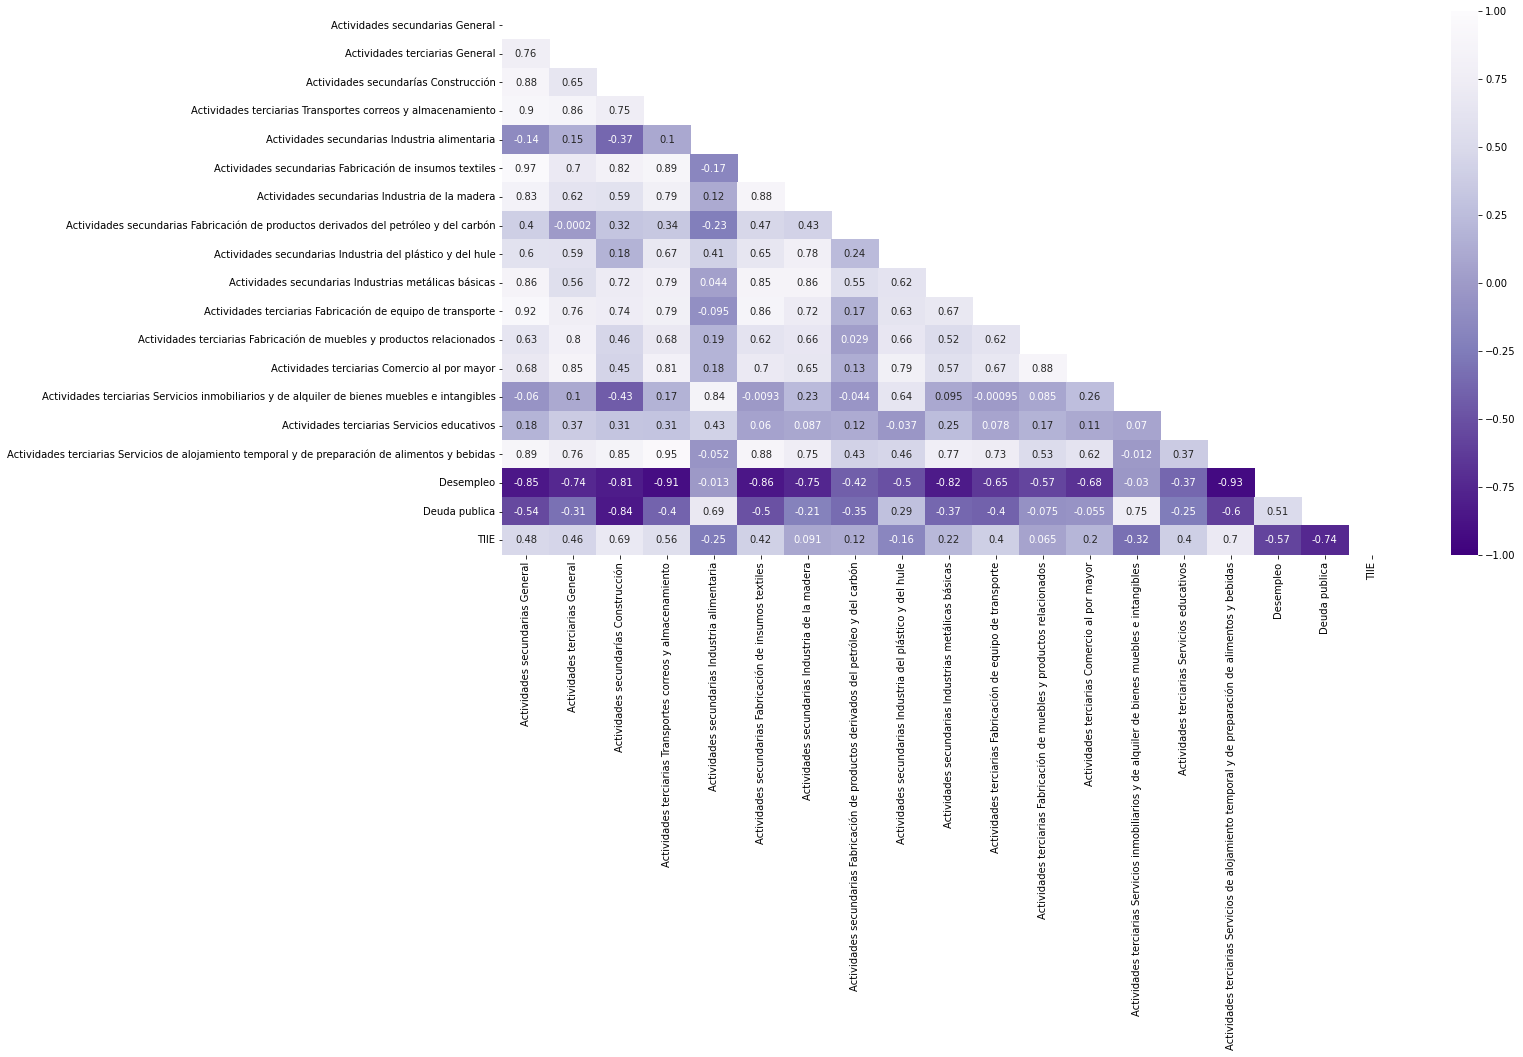

In [ ]:
##Resulta más intuitivo ver la matriz de correlación a través de un gráfico-heatmap de seaborn
plt.figure(figsize=(20,10)) #Definimos el tamaño del gráfico

#Definimos la correlación
upp_mat = np.triu(datos3.corr())
sns.heatmap(datos3.corr(), vmin=-1, vmax=+1, cmap="Purples_r", mask=upp_mat,  annot=True)
#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'

## Descomposición de las Series de Tiempo




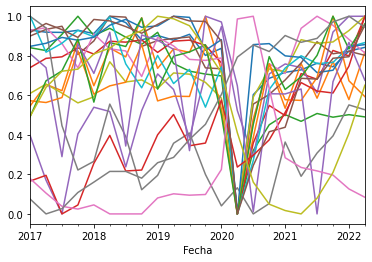

In [ ]:
for variable in datos3.columns:
  resultado=seasonal_decompose(datos3[variable], model='Additive', period=4)
  resultado.observed.plot()

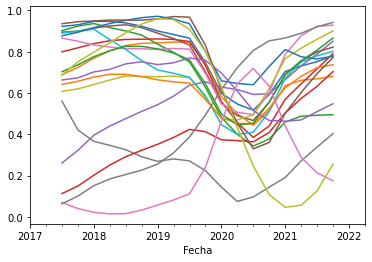

In [ ]:
for variable in datos3.columns:
  resultado=seasonal_decompose(datos3[variable], model='Additive', period=4)
  resultado.trend.plot()

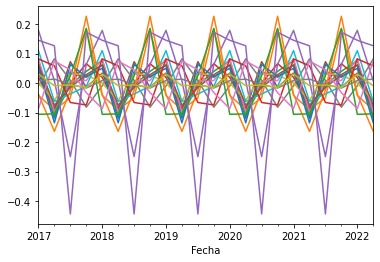

In [ ]:
for variable in datos3.columns:
  resultado=seasonal_decompose(datos3[variable], model='Additive', period=4)
  resultado.seasonal.plot()

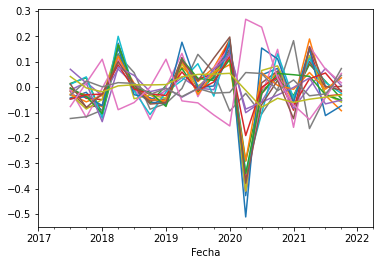

In [ ]:
for variable in datos3.columns:
  resultado=seasonal_decompose(datos3[variable], model='Additive', period=4)
  resultado.resid.plot()

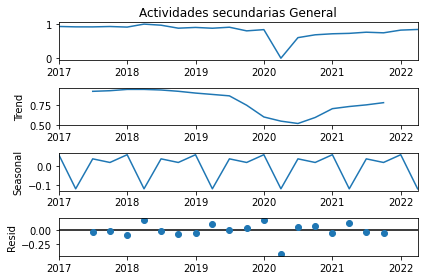

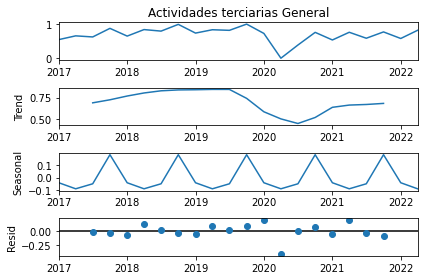

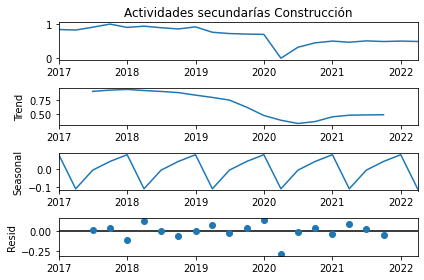

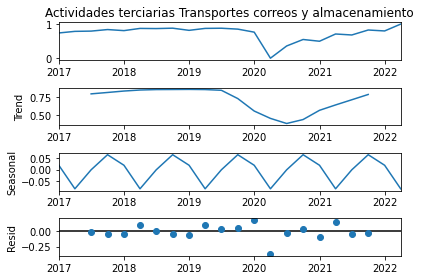

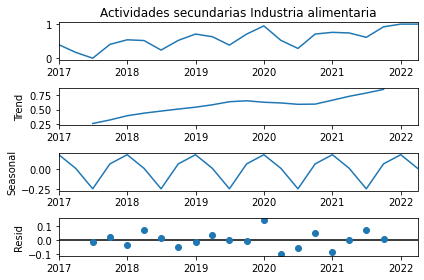

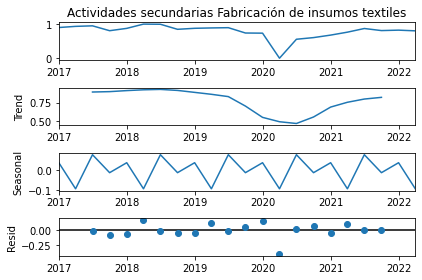

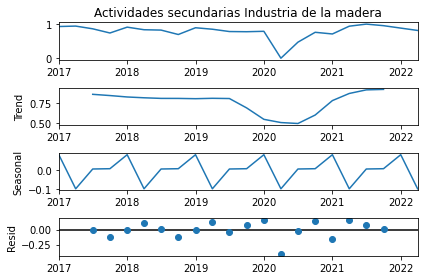

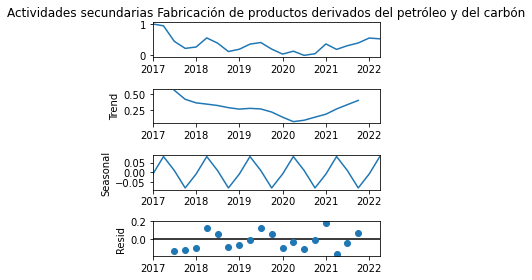

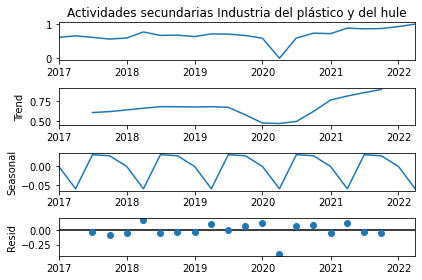

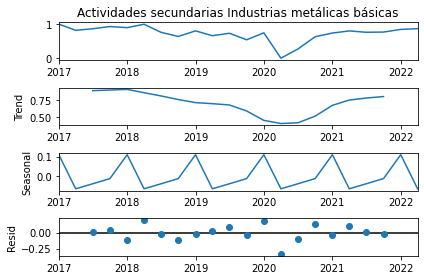

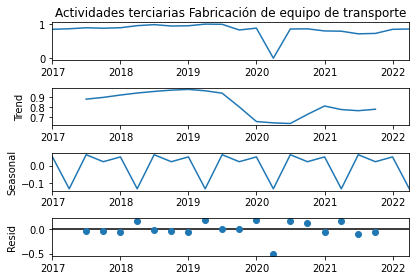

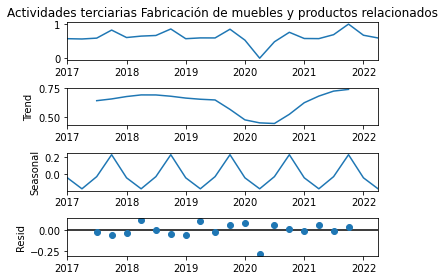

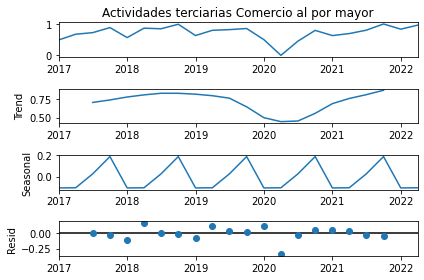

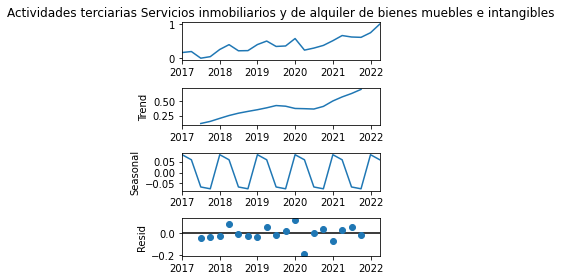

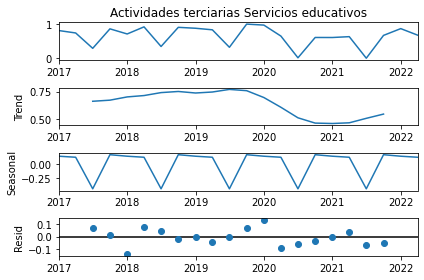

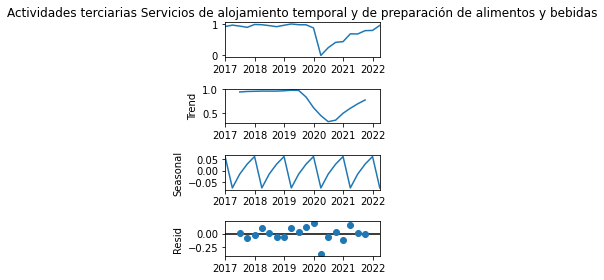

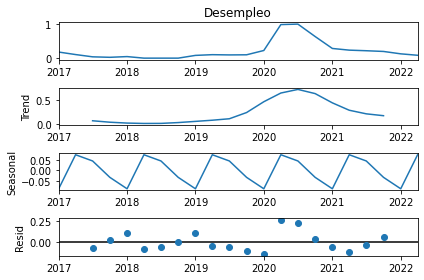

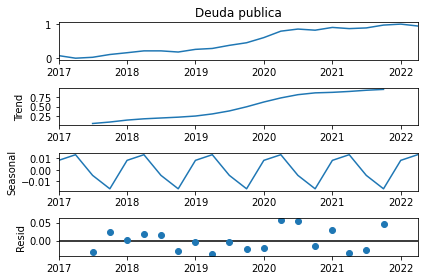

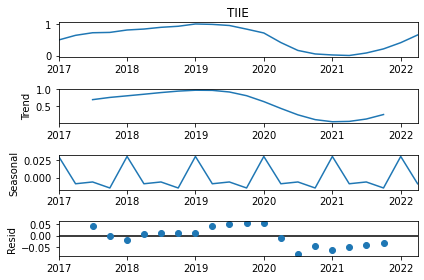

In [ ]:
#Descomposición individual de las series de tiempo
for variable in datos3.columns:
  resultado=seasonal_decompose(datos3[variable], model='Additive', period=4)
  resultado.plot()

## Test de Causalidad de Granger

In [ ]:
#importamos grangercausalitytests
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=6
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    datos3 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in datos3.columns:
        for r in datos3.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            datos3.loc[r, c] = min_p_value
    datos3.columns = [var + '_x' for var in variables]
    datos3.index = [var + '_y' for var in variables]
    return datos3

grangers_causation_matrix(datos3, variables = datos3.columns)  

Actividades secundarias General_x  \
Actividades secundarias General_y                                              1.0000   
Actividades terciarias General_y                                               0.0002   
Actividades secundarías Construcción_y                                         0.0151   
Actividades terciarias Transportes correos y al...                             0.0047   
Actividades secundarias Industria alimentaria_y                                0.0000   
Actividades secundarias Fabricación de insumos ...                             0.0000   
Actividades secundarias Industria de la madera_y                               0.6130   
Actividades secundarias Fabricación de producto...                             0.0000   
Actividades secundarias Industria del plástico ...                             0.0000   
Actividades secundarias Industrias metálicas bá...                             0.0000   
Actividades terciarias Fabricación de equipo de...                             0.0000   
Actividades terciarias Fabricación de muebles y...                             0.0024   
Actividades terciarias Comercio al por mayor_y                                 0.0000   
Actividades terciarias Servicios inmobiliarios ...                             0.0000   
Actividades terciarias Servicios educativos_y                                  0.0000   
Actividades terciarias Servicios de alojamiento...                             0.0005   
Desempleo_y                                                                    0.0166   
Deuda publica_y                                                                0.1561   
TIIE_y                                                                         0.0004   

                                                    Actividades terciarias General_x  \
Actividades secundarias General_y                                             0.0019   
Actividades terciarias General_y                                              1.0000   
Actividades secundarías Construcción_y                                        0.0000   
Actividades terciarias Transportes correos y al...                            0.0050   
Actividades secundarias Industria alimentaria_y                               0.0000   
Actividades secundarias Fabricación de insumos ...                            0.0004   
Actividades secundarias Industria de la madera_y                              0.0011   
Actividades secundarias Fabricación de producto...                            0.0000   
Actividades secundarias Industria del plástico ...                            0.0059   
Actividades secundarias Industrias metálicas bá...                            0.0002   
Actividades terciarias Fabricación de equipo de...                            0.0004   
Actividades terciarias Fabricación de muebles y...                            0.0000   
Actividades terciarias Comercio al por mayor_y                                0.0000   
Actividades terciarias Servicios inmobiliarios ...                            0.0000   
Actividades terciarias Servicios educativos_y                                 0.0000   
Actividades terciarias Servicios de alojamiento...                            0.0048   
Desempleo_y                                                                   0.0003   
Deuda publica_y                                                               0.0000   
TIIE_y                                                                        0.0000   

                                                    Actividades secundarías Construcción_x  \
Actividades secundarias General_y                                                   0.0154   
Actividades terciarias General_y                                                    0.0000   
Actividades secundarías Construcción_y                                              1.0000   
Actividades terciarias Transportes correos y al...                                  0.0741   
Actividades secundarias Industria alimen

## 7. Test de Cointegración

In [ ]:
#Importamos coint_johansen
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(datos3, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(datos3,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(datos3.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [ ]:
cointegration_test(datos3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/vector_ar/vecm.py:579: HypothesisTestWarning:

Critical values are only available for time series with 12 variables at most.



LinAlgError: ignored